<a href="https://colab.research.google.com/github/StillWork/ds_LS_530/blob/master/gg_43_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF%E1%84%87%E1%85%B5%E1%84%80%E1%85%AD_710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 슈퍼마켓 매출을 예측하는 선형모델 비교
## 데이터 받기
- 아래 사이트에서 로그인하고 register를 선택하면 데이터 다운로드 가능
- 데이터는 인도의 슈퍼마켓의 매출 기록 샘플이며 훈련데이터 8523개와 테스트 데이터 5681개를 제공함
- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
- 훈련 데이터 사본: https://bit.ly/2HsDP2p
- 테스트 데이터 사본: https://bit.ly/2WgqtdO

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
!curl -L https://bit.ly/2HsDP2p -o Train_UWu5bXk.txt
!curl -L https://bit.ly/2WgqtdO -o Test_u94Q5KV.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0    404      0 --:--:-- --:--:-- --:--:--   404
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  849k  100  849k    0     0   549k      0  0:00:01  0:00:01 --:--:--  549k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    407      0 --:--:-- --:--:-- --:--:--   407
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  515k  100  515k    0     0   383k      0  0:00:01  0:00:01 --:--:--  383k


In [0]:
# 슈퍼마켓 매출 데이터 읽기, 먼저 위의 사이트에 가서 등록을 하고 다운로드 받아야 함
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')

In [0]:
train.shape

(8523, 12)

In [0]:
train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
# 데이터 나누기
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

In [0]:
X[:3]

,Outlet_Establishment_Year,Item_MRP
0,1999,249.8092
1,2009,48.2692
2,1999,141.6180


In [0]:
# 선형회귀 모델
# 예측 특성으로 매장 개장 연도와 가격(Item_MRP) 두 개만 사용하는 경우

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales,
                                                   test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)
# 오차 자승의 평균, mse 계산
mse = np.mean((pred - y_test)**2)
# mse와 rmse 출력
mse, mse**(0.5)

(1990314.4086564458, 1410.7850327588699)

In [0]:
lreg.score(x_test, y_test)

0.3242020337746537

In [0]:
# 선형모델 계수 출력

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


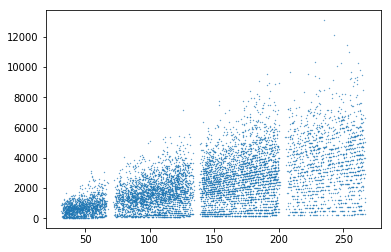

In [0]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, s=0.1)

- 매출이 설립된 연도에는 반비례하고 상품가격에는 비례하는 것을 알 수 있다.

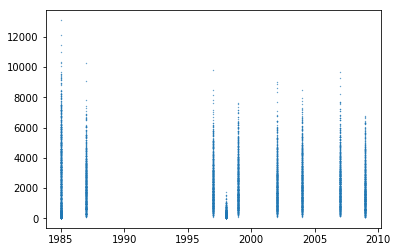

In [0]:
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales, s=0.1)

In [0]:
## 성능 평가 R squared
# 이 모델이 분산의 32%를 설명한다
lreg.score(x_test,y_test)

0.3242020337746537

# 데이터 전체 사용
## 전처리

In [0]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
# 무게를 평균치로 대체
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [0]:
train.Item_Visibility.value_counts().head(10)

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
Name: Item_Visibility, dtype: int64

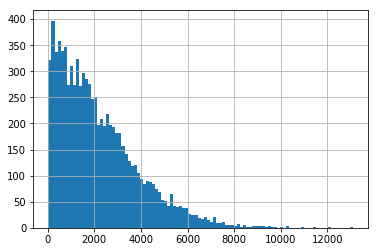

In [0]:
train.Item_Outlet_Sales.hist(bins=100)

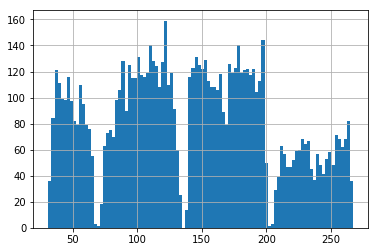

In [0]:
train.Item_MRP.hist(bins=100)

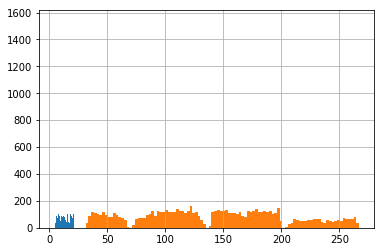

In [0]:
train.Item_Weight.hist(bins=100)

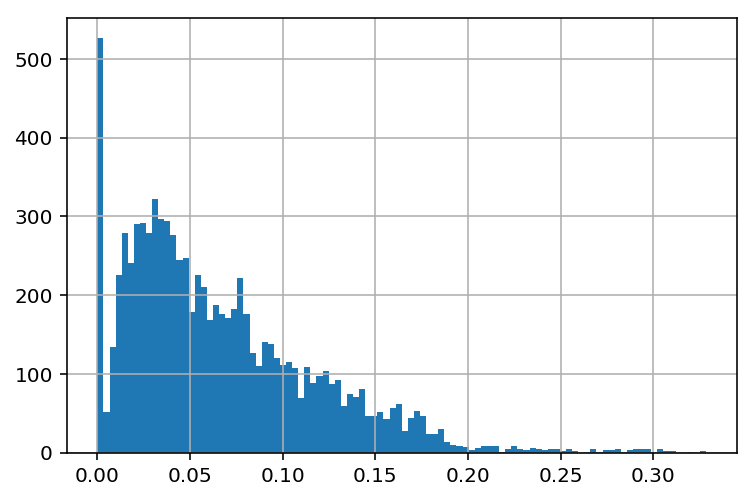

In [0]:
train.Item_Visibility.hist(bins=100)

In [0]:
# 0을 평균치로 대체
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

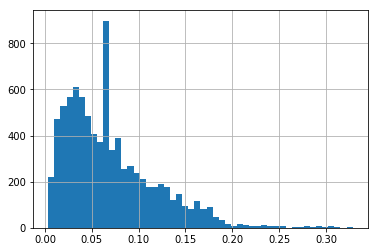

In [0]:
train.Item_Visibility.hist(bins=50)

In [0]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

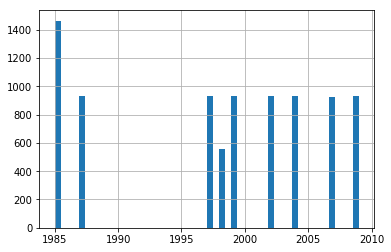

In [0]:
train.Outlet_Establishment_Year.hist(bins=50)

In [0]:
# 연도를 설립 기간으로 대체 (의미 있는 수치로 대체))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

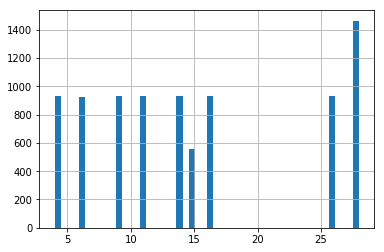

In [0]:
train.Outlet_Establishment_Year.hist(bins=50)

In [0]:
train.Outlet_Size.isnull().sum()

2410

In [0]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [0]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [0]:
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [0]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
# 상품명은 분석에서 제외
train.drop("Item_Identifier", axis=1, inplace=True)

In [0]:
train.Item_Fat_Content = train.Item_Fat_Content.replace('Low Fat','LF')
train.Item_Fat_Content = train.Item_Fat_Content.replace('low fat','LF')
train.Item_Fat_Content = train.Item_Fat_Content.replace('reg','Regular')

In [0]:
# 카테고리 변수 인코딩
# 먼저 타입이 object인 카테고리 변수의 리스트를 만든다.
object_list = list(train.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [0]:
train.Item_Fat_Content.value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [0]:
dummies = pd.get_dummies(train[object_list], prefix= object_list)

In [0]:
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_LF,1,0,1,0,1
Item_Fat_Content_Regular,0,1,0,1,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0
Item_Type_Frozen Foods,0,0,0,0,0
Item_Type_Fruits and Vegetables,0,0,0,1,0
Item_Type_Hard Drinks,0,0,0,0,0


In [0]:
# 원래의 열은 삭제하고 더미 변수 열을 추가한다.
X1 = train.drop(object_list, axis=1)

In [0]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


In [0]:
# 목적 변수
y = X1.Item_Outlet_Sales
X1 = X1.drop('Item_Outlet_Sales',1)

In [0]:
X1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300000,0.016047,249.8092,14
1,5.920000,0.019278,48.2692,4
2,17.500000,0.016760,141.6180,14
3,19.200000,0.066132,182.0950,15
4,8.930000,0.066132,53.8614,26
5,10.395000,0.066132,51.4008,4
6,13.650000,0.012741,57.6588,26
7,12.857645,0.127470,107.7622,28
8,16.200000,0.016687,96.9726,11
9,19.200000,0.094450,187.8214,6


In [0]:
X = pd.concat([X1,dummies], axis =1)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
analog = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
X[analog] = sc.fit_transform(X[analog])

In [0]:
X[:3].T

,0,1,2
Item_Weight,-0.841872,-1.641706,1.098554
Item_Visibility,-1.111358,-1.045067,-1.096733
Item_MRP,1.747454,-1.489023,0.010040
Outlet_Establishment_Year,14.000000,4.000000,14.000000
Item_Fat_Content_LF,1.000000,0.000000,1.000000
Item_Fat_Content_Regular,0.000000,1.000000,0.000000
Item_Type_Baking Goods,0.000000,0.000000,0.000000
Item_Type_Breads,0.000000,0.000000,0.000000
Item_Type_Breakfast,0.000000,0.000000,0.000000
Item_Type_Canned,0.000000,0.000000,0.000000


In [0]:
dummies.shape, X1.shape, X.shape 

((8523, 38), (8523, 4), (8523, 42))

In [0]:
list(train.select_dtypes(include=['float64']).columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [0]:
float_list = list(train.select_dtypes(exclude=['float64']).columns)
float_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [0]:
X1[:3]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,14
1,5.92,0.019278,48.2692,4
2,17.50,0.016760,141.6180,14


In [0]:
# 4개의 실수로 된 특성만 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183913
0.3459348199771225


In [0]:
X[:3].T

,0,1,2
Item_Weight,9.300000,5.920000,17.50000
Item_Visibility,0.016047,0.019278,0.01676
Item_MRP,249.809200,48.269200,141.61800
Outlet_Establishment_Year,14.000000,4.000000,14.00000
Item_Fat_Content_LF,1.000000,0.000000,1.00000
Item_Fat_Content_Regular,0.000000,1.000000,0.00000
Item_Type_Baking Goods,0.000000,0.000000,0.00000
Item_Type_Breads,0.000000,0.000000,0.00000
Item_Type_Breakfast,0.000000,0.000000,0.00000
Item_Type_Canned,0.000000,0.000000,0.00000


In [0]:
# 38개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1152.4900856024806
0.5490072197942046


Text(0.5, 1.0, 'Residual plot')

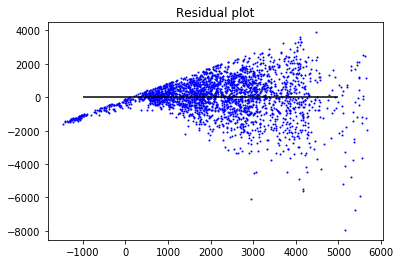

In [0]:
# residual plot - 비선형 성분이 많이 들어 있는 것을 알 수 있다.

x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

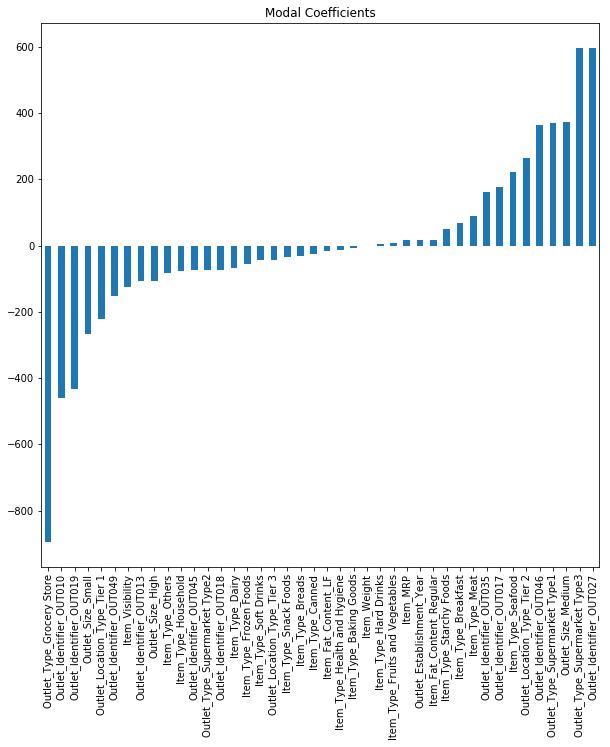

In [0]:
# checking the magnitude of coefficients
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [0]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.8, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(1236.7627347585712, 0.48064062530135887)

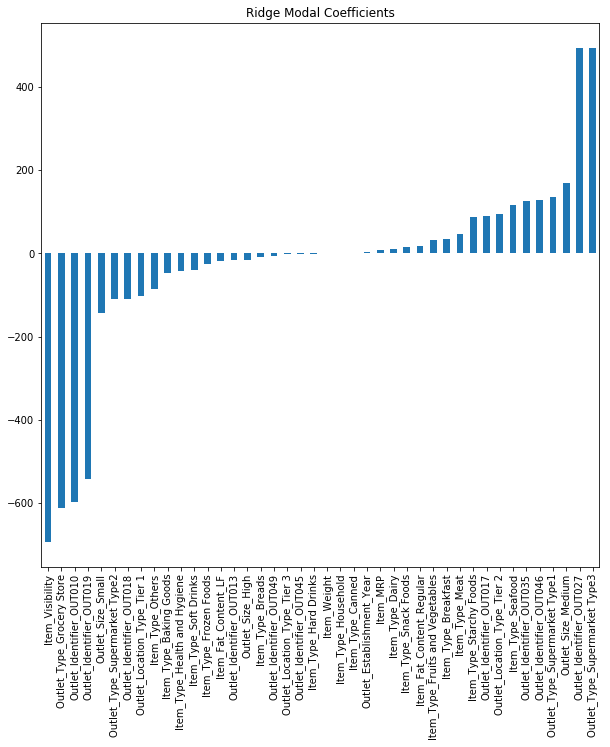

In [0]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

In [0]:
alpha = [0.001, 0.01, 0.05, 0.5, 1]
for a in alpha:
    ridgeReg = Ridge(alpha=a, normalize=True)
    ridgeReg.fit(x_train,y_train)
    print("a=", a, "R square = ", ridgeReg.score(x_test, y_test))

a= 0.001 R square =  0.5486826382589223
a= 0.01 R square =  0.5489082444202531
a= 0.05 R square =  0.5491731608147644
a= 0.5 R square =  0.5137188639777165
a= 1 R square =  0.4592070091434415


In [0]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(x_train,y_train)
print(lassoReg.score(x_test,y_test))

0.5495984446704982


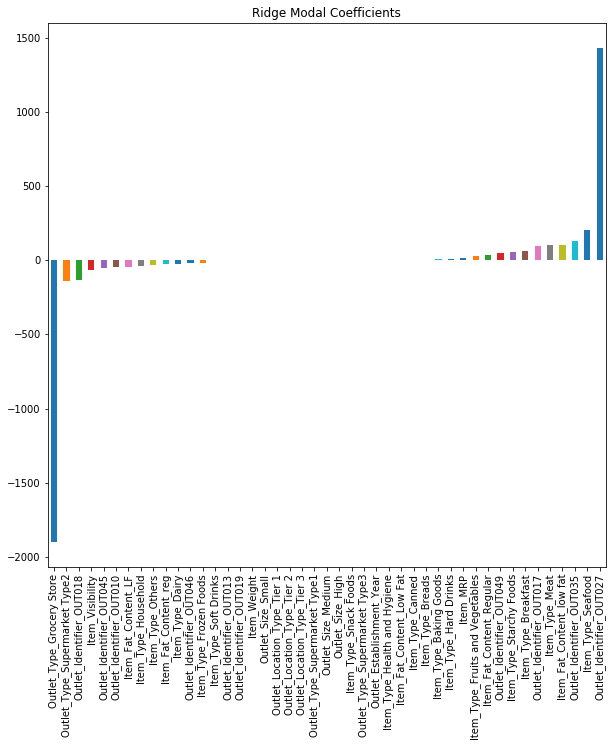

In [0]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(x_train,y_train)
print(rfc.score(x_test,y_test))

0.5478746344346498


In [0]:
pred = rfc.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse**0.5

1149.709458892751

In [0]:
type(y_test.get_values())

numpy.ndarray

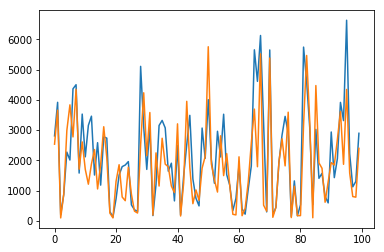

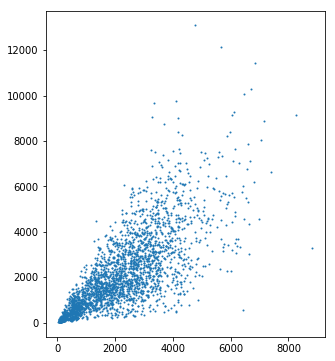

In [0]:
plt.plot(pred[:100])
plt.plot(y_test.get_values()[:100])
plt.show()
plt.figure(figsize=(5,6))
plt.scatter(pred,y_test.get_values(), s=1)